In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
!pip install yfinance

In [68]:
import yfinance as yf 
data = yf.download(tickers = "^GSPC AAPL", end="2022-02-07") 

[*********************100%***********************]  2 of 2 completed


In [69]:
df_price = data['Adj Close'] 
df_price

,AAPL,^GSPC
Date,,
1950-01-03,NaN,16.660000
1950-01-04,NaN,16.850000
1950-01-05,NaN,16.930000
1950-01-06,NaN,16.980000
1950-01-09,NaN,17.080000
...,...,...
2022-01-31,174.557602,4515.549805
2022-02-01,174.387817,4546.540039
2022-02-02,175.616257,4589.379883


In [70]:
df_price.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [71]:
# pd.DatetimeIndex(df_price['birth_date']).month

In [72]:
df_price

,AAPL,^GSPC
Date,,
1980-12-12,0.100326,129.229996
1980-12-15,0.095092,129.449997
1980-12-16,0.088112,130.600006
1980-12-17,0.090293,132.889999
1980-12-18,0.092911,133.000000
...,...,...
2022-01-31,174.557602,4515.549805
2022-02-01,174.387817,4546.540039
2022-02-02,175.616257,4589.379883


In [73]:
class FinancialInstrument(object): 
  def __init__(self, ser): 
    self.__symbol = ser.name 
    self.__df = pd.DataFrame() 
    self.__df['Price'] = ser   # Add your code here for Step 5

  def calc_logret(self): 
    self.__df['Log_ret'] = np.log(self.__df['Price']) - np.log(self.__df['Price'].shift(1)) # Add your code here for Step 6

  def get_quarter(self): 
    self.__df['Quarter'] = [((i.month-1)//3)+1 for i in self.__df.index] # Add your code here for Step 7

  def cal_logret_quarter(self): 
    groups = self.__df.groupby('Quarter')# Add your code here for Step 8
    self.__logret_quarter = groups['Log_ret'].sum()# Add your code here for Step 9
    return self.__logret_quarter

  def plot_hist(self): 
    plt.figure(figsize=(10, 4)) 
    for quarter in range(1, 5): 
      df_quarter = self.__df[self.__df['Quarter'] == quarter]['Log_ret'] # Add your code here for Step 10
      plt.subplot('14' + str(quarter), xlim=[-.15, .15], 
      title=self.__symbol + "'s Q" + str(quarter)) 
      df_quarter.hist(bins=50) 
  def __repr__(self): 
    self.__logret_quarter = self.cal_logret_quarter()
    rep = self.__symbol +  "'s sum of log returns by quarter:\n" + self.__logret_quarter.to_string()
    return rep
  # Add your code here for Step 11 


In [74]:
fin_insts = [] 
for symbol in df_price.columns: 
  fin_insts.append(FinancialInstrument(df_price[symbol]))

In [75]:
for fin_inst in fin_insts: 
  fin_inst.calc_logret() 
  fin_inst.get_quarter() 
  fin_inst.cal_logret_quarter() 

In [76]:
for fin_inst in fin_insts: 
 print(fin_inst._FinancialInstrument__df) 

                 Price   Log_ret  Quarter
Date                                     
1980-12-12    0.100326       NaN        4
1980-12-15    0.095092 -0.053581        4
1980-12-16    0.088112 -0.076231        4
1980-12-17    0.090293  0.024450        4
1980-12-18    0.092911  0.028580        4
...                ...       ...      ...
2022-01-31  174.557602  0.025790        1
2022-02-01  174.387817 -0.000973        1
2022-02-02  175.616257  0.007020        1
2022-02-03  172.679993 -0.016861        1
2022-02-04  172.389999 -0.001681        1

[10376 rows x 3 columns]
                  Price   Log_ret  Quarter
Date                                      
1980-12-12   129.229996       NaN        4
1980-12-15   129.449997  0.001701        4
1980-12-16   130.600006  0.008845        4
1980-12-17   132.889999  0.017382        4
1980-12-18   133.000000  0.000827        4
...                 ...       ...      ...
2022-01-31  4515.549805  0.018710        1
2022-02-01  4546.540039  0.006840        

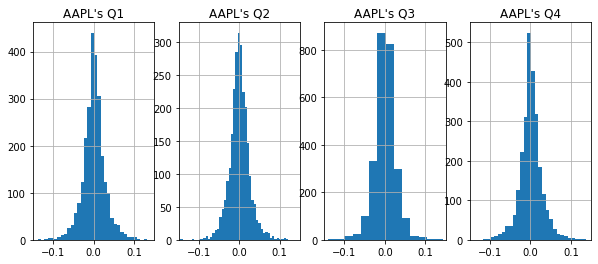

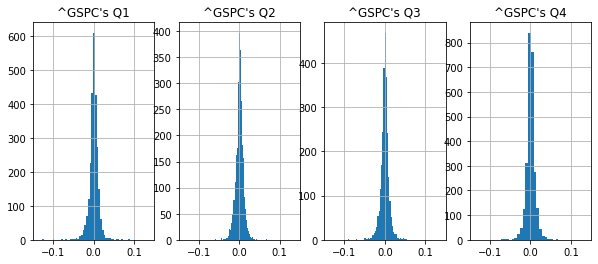

In [77]:
for fin_inst in fin_insts: 
  fin_inst.plot_hist() 

In [78]:
for fin_inst in fin_insts: 
  print(fin_inst) 

AAPL's sum of log returns by quarter:
Quarter
1    2.517304
2    0.782543
3    0.541460
4    3.607787
^GSPC's sum of log returns by quarter:
Quarter
1    0.751044
2    1.152199
3    0.004022
4    1.643092


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('assignment7.csv')


In [6]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [11]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(X, y, test_size = 0.3)

ValueError: too many values to unpack (expected 2)

In [19]:
a,b = train_test_split(df, test_size = 0.3)

In [20]:
a

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
609,1,111,62,13,182,24.0,0.138,23,0
349,5,0,80,32,0,41.0,0.346,37,1
51,1,101,50,15,36,24.2,0.526,26,0
699,4,118,70,0,0,44.5,0.904,26,0
410,6,102,90,39,0,35.7,0.674,28,0
...,...,...,...,...,...,...,...,...,...
47,2,71,70,27,0,28.0,0.586,22,0
728,2,175,88,0,0,22.9,0.326,22,0
414,0,138,60,35,167,34.6,0.534,21,1
655,2,155,52,27,540,38.7,0.240,25,1


In [62]:
class dd:
    def __init__(self):
#         self.a = 10
        print('hello')
        
    def test(self):
        self.__b = 12
        
    def another(self):
#         self.test()
        print(self.__b)

In [63]:
a = dd()

hello


In [64]:
a.another()

AttributeError: 'dd' object has no attribute '_dd__b'